# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

df_twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit_notify = True)

In [4]:

df_tweet_json_list = []
with open('tweet-json.txt', encoding='utf-8') as file:
    #line_numbers = sum(1 for line in file)
    line = 'not empty'
    count = 0
    while line and count < 2354:
        line = file.readline()
        count+=1
        df_tweet_json_list.append({'tweet_ID': json.loads(line)["id"], 
                            'retweet_count': json.loads(line)["retweet_count"], 
                            'favorite_count': json.loads(line)["favorite_count"]})

df_tweet_json = pd.DataFrame(df_tweet_json_list, columns = ['tweet_ID', 'retweet_count', 'favorite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
# for visual assessment
df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
# for visual assessment
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
# for visual assessment
df_tweet_json

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [8]:
# checking missing values and data types
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# checking missing values and data types
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# checking missing values and data types
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_ID          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
# check for quality issue / tidiness randomly
df_twitter_archive_enhanced['text'][3]

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ'

In [12]:
# check for quality issue / tidiness randomly
df_twitter_archive_enhanced['source'].sample()

1641    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [13]:
# from visual to program for checking url repetition
import random
x=0
while x <= 63:
    index = random.randint(0, len(df_twitter_archive_enhanced)-1)
    x = len(df_twitter_archive_enhanced['expanded_urls'][index])
    y=df_twitter_archive_enhanced['expanded_urls'][index]

df_twitter_archive_enhanced['expanded_urls'][index]

'https://twitter.com/dog_rates/status/749064354620928000/photo/1,https://twitter.com/dog_rates/status/749064354620928000/photo/1'

In [14]:
# check for duplicated id
sum(df_twitter_archive_enhanced['tweet_id'].duplicated())

0

In [15]:
# check denominator different 10

df_twitter_archive_enhanced.query('rating_denominator != 10')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [16]:
# importing image and random libraries
from IPython.display import Image
from IPython.core.display import HTML 
import random

# Taking images that could not be a dog
df_not_dog_image = df_image_predictions[(df_image_predictions['p1_dog']==False) &  (df_image_predictions['p2_dog']==False) & (df_image_predictions['p3_dog']==False)]

# Taking 10 sample of images that could not be a dog then display for confirmation
for count in range(10):
    sample_index = -1
    while sample_index not in df_not_dog_image.index:
        sample_index = random.randint(0, len(df_not_dog_image)-1)
    ur = df_not_dog_image.loc[sample_index,'jpg_url']
    display(Image(url= ur,  width=200, height=100))

In [17]:
# collect rows not related to dog rating in a data frme called df_not_dog_rating
df_not_dog_rating = df_twitter_archive_enhanced[df_twitter_archive_enhanced['text'].str[0:17] == 'We only rate dogs']
df_not_dog_rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
141,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None
154,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None
390,826240494070030336,NaN,NaN,2017-01-31 01:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826240494...,11,10,None,None,None,None,None
419,822244816520155136,NaN,NaN,2017-01-20 00:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,None,None,None
494,813187593374461952,NaN,NaN,2016-12-26 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in other ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813187593...,13,10,None,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
744,780192070812196864,NaN,NaN,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,11,10,None,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [18]:
# check how many are not related to dog rating
len(df_not_dog_rating)

17

In [19]:
df_twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [20]:
df_twitter_archive_enhanced[['text', 'rating_numerator', 'rating_denominator']][df_twitter_archive_enhanced['rating_numerator'] == df_twitter_archive_enhanced['rating_numerator'].min()]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,0,10
1016,"PUPDATE: can't see any. Even if I could, I cou...",0,10


In [21]:
df_twitter_archive_enhanced.loc[315,'text']

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [22]:
df_twitter_archive_enhanced.loc[1016,'text']

"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"

In [23]:
df_twitter_archive_enhanced[['rating_numerator', 'rating_denominator']][df_twitter_archive_enhanced['rating_denominator'] == df_twitter_archive_enhanced['rating_denominator'].min()]

,rating_numerator,rating_denominator
313,960,0


In [24]:
df_twitter_archive_enhanced.loc[313,'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [25]:
df_twitter_archive_enhanced[['text', 'rating_numerator', 'rating_denominator']][df_twitter_archive_enhanced['rating_numerator'] >= 20]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
290,@markhoppus 182/10,182,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
902,Why does this never happen at my front door......,165,150


In [26]:
# 892420643555336193 first tweet_id on df_twitter_archive_enhanced and df_tweet_json but last on df_image_predictions
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df_tweet_json.describe()

,tweet_ID,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [28]:
df_tweet_json[df_tweet_json['favorite_count'] == df_tweet_json['favorite_count'].max()]

,tweet_ID,retweet_count,favorite_count
412,822872901745569793,48265,132810


In [29]:
df_tweet_json[df_tweet_json['favorite_count'] == df_tweet_json['favorite_count'].min()]

,tweet_ID,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
77,877611172832227328,83,0
90,874434818259525634,15546,0
94,873697596434513921,12518,0
96,873337748698140672,1667,0
100,872668790621863937,31,0


In [30]:
df_tweet_json[df_tweet_json['retweet_count'] == df_tweet_json['retweet_count'].max()]

,tweet_ID,retweet_count,favorite_count
1037,744234799360020481,79515,131075


In [31]:
df_tweet_json[df_tweet_json['retweet_count'] == df_tweet_json['retweet_count'].min()]

,tweet_ID,retweet_count,favorite_count
290,838085839343206401,0,150


### Quality issues

>**df_twitter_archive_enhanced** table
1. So many **missing values** for in_reply_to_status_id and in_reply_to_user_id attributes, same issues for **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp**
2. content of **source** column should be an **url without html anchor**. 
3. Attributes **timestamp** data type are not a **date** format.
4. Some tweet ratings are **not for a dog**.
5. Some **duplicated url** for  **expanded_urls** attributes.
6. There is **rating_denominator** equal to zero.
7. some rating denominator are greatter than 10
8.  **text** column contain **text description**  and  **url**. They should be in two separated   columns named **text** and **url**

>**image_prediction** table
9. some tweet **images** are not a dog 



### Tidiness issues

>**df_twitter_archive_enhanced**
1. **doggo, floofer, pupper** and **puppo** columns should be represented by one column named **stage** with datatype **category**

>**tweet_json.txt**
2.  **tweet_ID** should be **tweet_id** for **tweet_json.txt** and for all tables.

>**df_twitter_archive_enhanced, tweet_json, image_prediction**
3. The three tables need to be merge in one table by **tweet_id**.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Copies of original  data

In [32]:
# copies of original pieces of data
df_twitter_enhanced_clean = df_twitter_archive_enhanced.copy()
df_image_predictions_clean= df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

### Quality issues

### Issue #1: So many **missing values** for in_reply_to_status_id and in_reply_to_user_id attributes, same issues for **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp** columns.

#### Define: Remove the few rows with non missing values

#### code

In [33]:
#Remove all rows related where few values exists
reply_index = df_twitter_enhanced_clean[df_twitter_enhanced_clean['in_reply_to_status_id'].notnull()].index
df_twitter_enhanced_clean.drop(reply_index, inplace = True)

#Remove all rows related to retweets 
retweeted_index = df_twitter_enhanced_clean[df_twitter_enhanced_clean['retweeted_status_id'].notnull()].index
df_twitter_enhanced_clean.drop(retweeted_index, inplace = True)

#### Test

In [34]:
#check how many non missing values left for in_reply_to_status_id and in_reply_to_user_id, should be zero.
sum(df_twitter_enhanced_clean['in_reply_to_status_id'].notnull()) + sum(df_twitter_enhanced_clean['in_reply_to_user_id'].notnull())

0

In [35]:
# All retweets should be gone
sum(df_twitter_enhanced_clean['retweeted_status_id'].notnull()) + sum(df_twitter_enhanced_clean['retweeted_status_user_id'].notnull()) + sum(df_twitter_enhanced_clean['retweeted_status_timestamp'].notnull())

0

In [36]:
# Now, we can drop  the two columns in_reply_to_status_id and in_reply_to_user_id
df_twitter_enhanced_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

# Now, we can drop  the two columns in_reply_to_status_id and in_reply_to_user_id
df_twitter_enhanced_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Issue #2: content of **source** column should be an **url without html anchor**.

#### Define: Remove anchor < a > ...< /a > for all text in source column using regular expression

#### Code

In [37]:
# Removing anchor < a > ...< /a >
import re
def clean_source(text):
    if re.search('http.*rel', text):
        start =re.search('http.*rel', text).start()
        end = re.search('rel', text).start()-2
        return text[start: end]
    else:
        return text

df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].apply(clean_source)

#### Test

In [38]:
df_twitter_enhanced_clean['source'].sample(10)

1687    http://twitter.com/download/iphone
854     http://twitter.com/download/iphone
83      http://twitter.com/download/iphone
1071    http://twitter.com/download/iphone
1783    http://twitter.com/download/iphone
2250    http://twitter.com/download/iphone
1163    http://twitter.com/download/iphone
1539    http://twitter.com/download/iphone
834     http://twitter.com/download/iphone
2290    http://twitter.com/download/iphone
Name: source, dtype: object

### Issue #3: data type of ***timestamp*** column is not a ***date*** format

#### Define: Transform ***Timestamp*** data type to ***date*** format using to_datetime

#### Code

In [39]:
#convert data type to date and time
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean['timestamp'])

#### Test

In [40]:
#check if the data type conversion is successful
df_twitter_enhanced_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2097 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.8 KB


### Issue #4: Some tweet ratings are **not for a dog**.

#### Define: Remove rows for not a dog rating using drop method

#### Code

In [41]:
df_twitter_enhanced_clean.drop(df_not_dog_rating.index, inplace = True)

#### Test

In [42]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean['text'].str[0:17] == 'We only rate dogs']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5: Some duplicated url for expanded_urls attributes

#### Define: Remove other repetitive url using regular expression

#### Code

In [43]:
#  keeping only one url and remove other repetitive urls if exist

import re

def keep_one_url(text):
    try:
        http=[m.start() for m in re.finditer('http', text)]
        if len(http)>1:
            return text[http[0]:http[1]-1]
        else:
            return text[http[0]:]
    except:
        print('there is some errors')

df_twitter_enhanced_clean['expanded_urls'] = df_twitter_enhanced_clean['expanded_urls'].apply(keep_one_url)


there is some errors
there is some errors
there is some errors


#### Test

In [44]:
# checking for duplicated url 
for count in range(10):
    sample_index = -1
    while sample_index not in df_twitter_enhanced_clean.index:
        sample_index = random.randint(0, len(df_twitter_enhanced_clean)-1)
    print(df_twitter_enhanced_clean['expanded_urls'][sample_index])

https://twitter.com/dog_rates/status/870374049280663552/photo/1
https://vine.co/v/ixHYvdxUx1L
https://twitter.com/dog_rates/status/753655901052166144/photo/1
https://vine.co/v/5W5YHdTJvaV
https://twitter.com/dog_rates/status/675483430902214656/photo/1
https://twitter.com/dog_rates/status/672594978741354496/photo/1
https://twitter.com/dog_rates/status/695816827381944320/photo/1
https://twitter.com/dog_rates/status/683449695444799489/photo/1
https://twitter.com/dog_rates/status/676237365392908289/photo/1
https://twitter.com/dog_rates/status/843856843873095681/photo/1


### Issue #6: There is **rating_denominator** equal to zero. 

#### Define: Replace the rating_numerator with 13 and the rating_denominator 10 where rating_denominator = 0

#### Code

In [45]:
df_twitter_enhanced_clean['rating_numerator'][df_twitter_enhanced_clean['rating_denominator']==0]= 13
df_twitter_enhanced_clean['rating_denominator'][df_twitter_enhanced_clean['rating_denominator']==0]= 10


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [46]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean['rating_denominator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7: some rating denominator are greatter than 10

#### Define: normalize the rating numerator and denominator by multiplying with ***(10 / denominator)*** for each row.

#### Code

In [47]:
# normalizing the rating numerator and rating denominator
index = df_twitter_enhanced_clean[df_twitter_enhanced_clean['rating_denominator'] > 10].index
df_twitter_enhanced_clean['rating_numerator'] = df_twitter_enhanced_clean['rating_numerator']/df_twitter_enhanced_clean['rating_denominator']*10
df_twitter_enhanced_clean['rating_denominator'] = 10


#### Test

In [48]:
df_twitter_enhanced_clean.loc[index]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,http://twitter.com/download/iphone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12.000000,10,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,http://twitter.com/download/iphone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11.000000,10,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,http://twitter.com/download/iphone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,8.181818,10,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,http://twitter.com/download/iphone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12.000000,10,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,http://twitter.com/download/iphone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,2.000000,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,http://twitter.com/download/iphone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,10.000000,10,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,http://twitter.com/download/iphone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11.000000,10,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,http://twitter.com/download/iphone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10.000000,10,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,http://twitter.com/download/iphone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9.000000,10,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30,http://twitter.com/download/iphone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12.000000,10,a,None,None,None,None


### Issue #8: some tweet **images** are not a dog 

#### Define: Remove rows where tweet images are not a dog

#### Code

In [49]:
# romoving rows where tweet images are not a dog
df_image_predictions_clean.drop(df_not_dog_image.index, inplace =True)

#### Test

In [50]:

df_not_dog_image = df_image_predictions_clean[(df_image_predictions_clean['p1_dog']==False) &  (df_image_predictions['p2_dog']==False) & (df_image_predictions['p3_dog']==False)]
len(df_not_dog_image)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0

### Issue #9: In **text** column : text + url 

#### Define: split text and url in two different columns using regular expression method

#### Code

In [51]:
# split text and url from text column to two columns named text and url

import re

def split_text(text):
    if re.search('http.*', text):
        start =re.search('http.*', text).start()
        return text[:start-1]
    else:
        return text
    
def split_url(text):
    if re.search('http.*', text):
        start =re.search('http.*', text).start()
        return text[start:]
    else:
        return text    

df_twitter_enhanced_clean['url'] = df_twitter_enhanced_clean['text'].apply(split_url)
df_twitter_enhanced_clean['text'] = df_twitter_enhanced_clean['text'].apply(split_text)



#### Test

In [52]:
df_twitter_enhanced_clean['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

In [53]:
df_twitter_enhanced_clean['url'][0]

'https://t.co/MgUWQ76dJU'

### Tidiness issues

### issue #1: doggo, floofer, pupper and puppo columns should be represented by one column named stage

#### Define : we create a new column named 'stage' then fit in all existing values in doggo, floofer, pupper and puppo columns

#### Code

In [54]:
df_twitter_enhanced_clean['stage'] = df_twitter_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
df_twitter_enhanced_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)
df_twitter_enhanced_clean['stage'] = df_twitter_enhanced_clean['stage'].astype('category')

#### Test

In [55]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2080 non-null int64
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null float64
rating_denominator    2080 non-null int64
name                  2080 non-null object
url                   2080 non-null object
stage                 353 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 244.7+ KB


### Issue #2: tweet_ID should be tweet_id for tweet_json.txt and for all tables.

#### Define : Rename tweet_ID to  tweet_id

#### Code

In [56]:
# Rename tweet_ID API twitter
df_tweet_json_clean = df_tweet_json_clean.rename(columns = {'tweet_ID': 'tweet_id'})

#### Test

In [57]:
# check columns names
df_tweet_json_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #3: The three tables need to be merge in one table.

#### Define : Merge three data using merge library

#### Code

In [58]:
# Merge the two data, df_twitter_enhanced_clean and df_image_predictions_clean
df_merge = pd.merge(df_twitter_enhanced_clean, df_image_predictions_clean, how='inner', on='tweet_id')

#### Merge the df_tweet_json_clean
df_merge = pd.merge(df_merge, df_tweet_json_clean, how='inner', on='tweet_id')

#### Test

In [59]:
df_merge

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,url,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://t.co/0Xxu71qeIV,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://t.co/wUnZnhtVJB,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://t.co/tD36da7qLQ,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://t.co/AtUZn91f7f,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
4,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,https://t.co/kQ04fDDRmh,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
5,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13.0,10,Jax,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041
6,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,https://t.co/v0nONBcwxq,NaN,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
7,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,https://t.co/9TwLuAGH0b,NaN,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226
8,890240255349198849,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,https://t.co/t1bfwz5S2A,doggo,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
9,890006608113172480,2017-07-26 00:31:25,http://twitter.com/download/iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,https://t.co/dVPW0B0Mme,NaN,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,7624,31166


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
df_merge.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Positive correlation between retweet count and favorite count
2. Positive correlation between p1_conf and favorite count
3. Positive correlation between p1_conf and retweet_count 
4. Negative correlation between p2_conf and favorite count
5. Negative correlation between p2_conf and retweet_count 
6. Negative correlation between p3_conf and favorite count
7. Negative correlation between p3_conf and retweet_count 
8. Positive correlation between rating_numerator and favorite_count
9. Positive correlation between rating_numerator and retweet_count
10. Lower rate of false dog breed compared to true dog breed prediction
11. No big difference between false dog breed and true dog breed prediction distribution

In [61]:
# Import dataset
df_master = pd.read_csv('twitter_archive_master.csv')

### Analyzing

In [62]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,url,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://t.co/0Xxu71qeIV,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://t.co/wUnZnhtVJB,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://t.co/tD36da7qLQ,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://t.co/AtUZn91f7f,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
4,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,https://t.co/kQ04fDDRmh,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562


In [63]:
df_master.shape

(1652, 23)

In [64]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 23 columns):
tweet_id              1652 non-null int64
timestamp             1652 non-null object
source                1652 non-null object
text                  1652 non-null object
expanded_urls         1652 non-null object
rating_numerator      1652 non-null float64
rating_denominator    1652 non-null int64
name                  1652 non-null object
url                   1652 non-null object
stage                 270 non-null object
jpg_url               1652 non-null object
img_num               1652 non-null int64
p1                    1652 non-null object
p1_conf               1652 non-null float64
p1_dog                1652 non-null bool
p2                    1652 non-null object
p2_conf               1652 non-null float64
p2_dog                1652 non-null bool
p3                    1652 non-null object
p3_conf               1652 non-null float64
p3_dog                1652 non-null b

#### drop unecessary columns: tweet_id, timestamp, source, text, expanded_urls, name, url, jpg_url 

In [65]:
df_master.drop(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name', 'url', 'jpg_url'], axis = 1, inplace = True);

In [66]:
df_master.columns

Index(['rating_numerator', 'rating_denominator', 'stage', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [67]:
df_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1652.000000,1652.0,1652.000000,1652.000000,1652.000000,1.652000e+03,1652.000000,1652.000000
mean,10.877622,10.0,1.214891,0.606240,0.137255,6.135322e-02,2795.317191,9164.411622
std,2.523652,0.0,0.575448,0.266368,0.101701,5.201897e-02,4786.006324,12468.848972
min,0.000000,10.0,1.000000,0.044333,0.000010,2.160900e-07,16.000000,81.000000
25%,10.000000,10.0,1.000000,0.379287,0.054704,1.594160e-02,646.750000,2160.250000
50%,11.000000,10.0,1.000000,0.607074,0.121376,4.985555e-02,1423.500000,4363.000000
75%,12.000000,10.0,1.000000,0.853315,0.199314,9.470035e-02,3251.000000,11638.000000
max,75.000000,10.0,4.000000,0.999984,0.467678,2.734190e-01,79515.000000,132810.000000


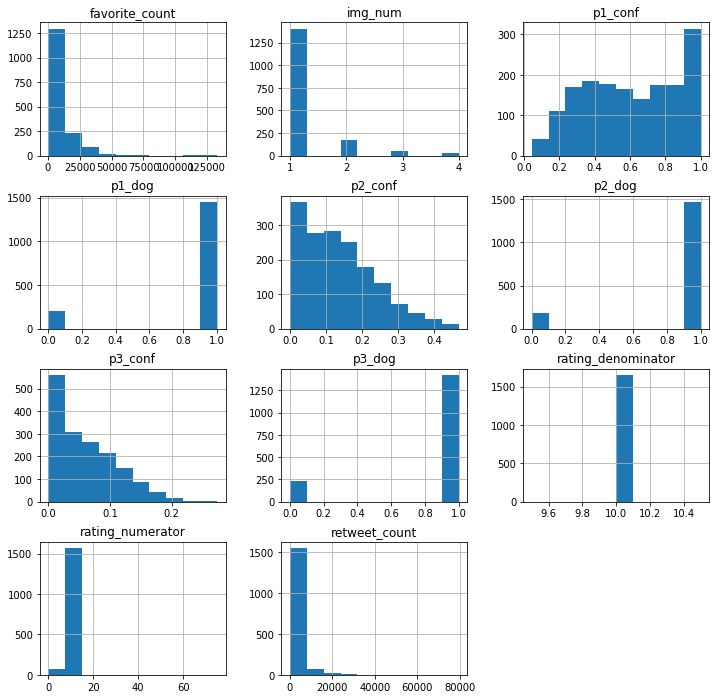

In [94]:
df_master.hist(figsize = (12,12));

### Visualization

In [69]:
# Plot scatter points
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Let us define a function that plot two variables and allow us to check visually a correlation

In [70]:
# Visual correlation between x and y in dataframe df
def correlation(df, x, y):
    plt.scatter(df[x], df[y])
    plt.title(x+" vs "+y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()

#### Is there any correlation between retweet count and favorite count ?

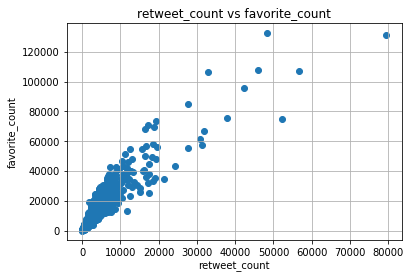

In [71]:
# checking correlation between retweet count and favorite count
correlation(df_master, 'retweet_count', 'favorite_count')

#### Is there any correlation between p1_conf and favorite count ?

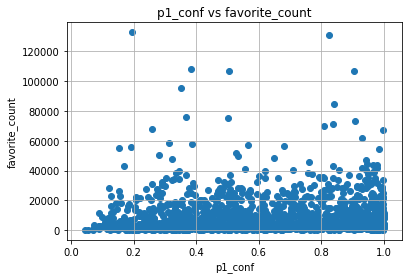

In [72]:
# checking correlation between p1_conf and favorite count
correlation(df_master, 'p1_conf', 'favorite_count')

#### Is there any correlation between p1_conf and retweet_count ?

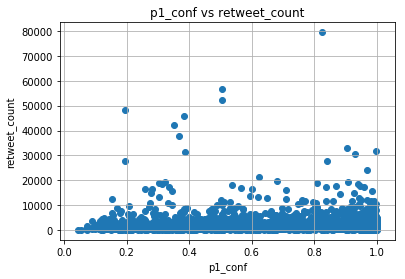

In [73]:
# checking correlation between p1_conf and retweet_count
correlation(df_master, 'p1_conf', 'retweet_count')

#### Is there any correlation between p2_conf and favorite count ?

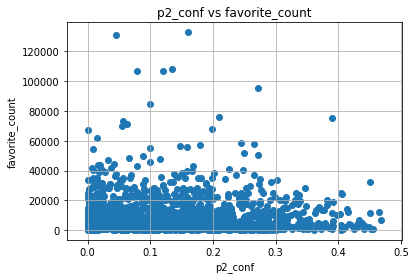

In [74]:
# checking correlation between p2_conf and favorite count
correlation(df_master, 'p2_conf', 'favorite_count')

#### Is there any correlation between p2_conf and retweet_count ?

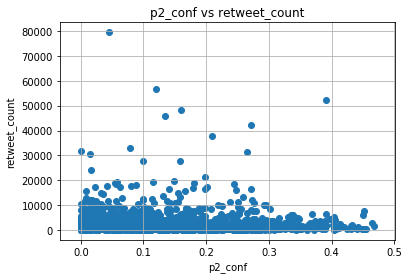

In [75]:
# checking correlation between p2_conf and retweet_count 
correlation(df_master, 'p2_conf', 'retweet_count')

#### Is there any correlation between p3_conf and favorite count ?

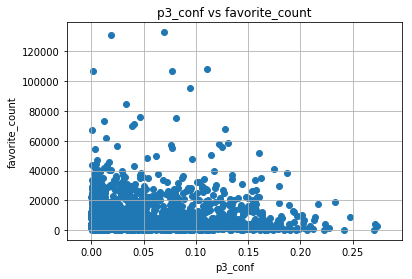

In [76]:
# checking correlation between p3_conf and favorite count
correlation(df_master, 'p3_conf', 'favorite_count')

#### Is there any correlation between p3_conf and retweet_count ?

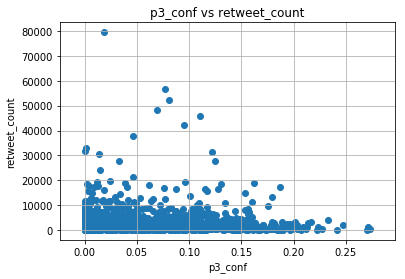

In [77]:
# checking correlation between p3_conf and retweet_count 
correlation(df_master, 'p3_conf', 'retweet_count')

#### Is there any correlation between rating_numerator and favorite count ?

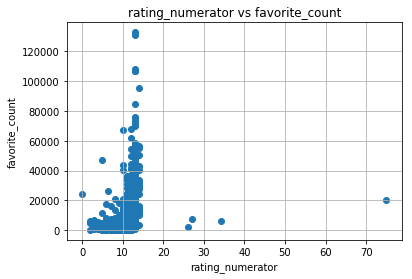

In [78]:
# checking correlation between rating_numerator and favorite count
correlation(df_master, 'rating_numerator', 'favorite_count')

#### Is there any correlation between tweet rating and retweet_count ?

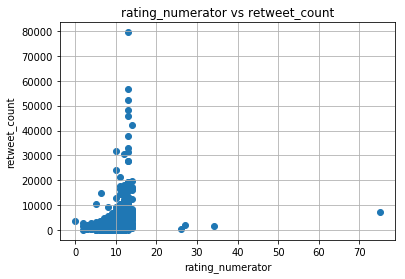

In [79]:
# checking correlation between rating_numerator and retweet_count 
correlation(df_master, 'rating_numerator', 'retweet_count')

#### Let us remove outlier corresponding to rating_numerator  > 20

In [80]:
df = df_master[df_master['rating_numerator'] < 20]

#### Is there any correlation between rating_numerator and favorite count ?

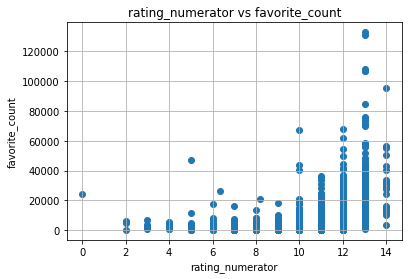

In [81]:
# checking correlation between rating_numerator and favorite count
correlation(df, 'rating_numerator', 'favorite_count')

#### Is there any correlation between tweet rating and retweet_count ?

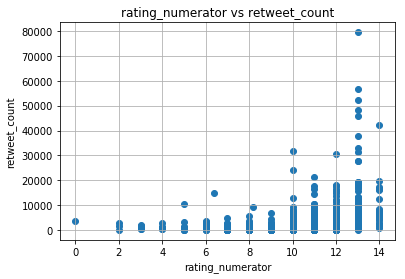

In [82]:
# checking for correlation between rating_numerator and retweet_count 
correlation(df, 'rating_numerator', 'retweet_count')

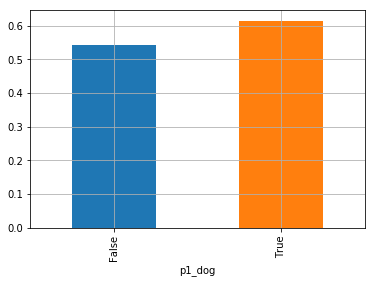

In [83]:

df.groupby('p1_dog').p1_conf.mean().plot(kind = 'bar');
plt.grid()


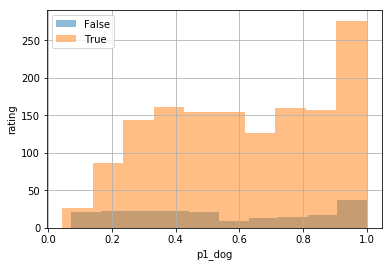

In [84]:
df.groupby('p1_dog').p1_conf.plot(kind = 'hist', alpha = 0.5);
plt.xlabel('p1_dog')
plt.ylabel('rating')
plt.legend()
plt.grid()

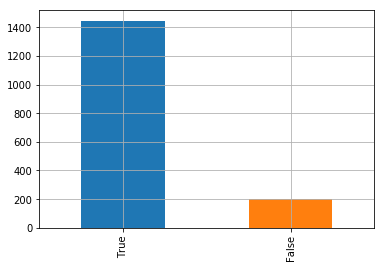

In [85]:
df['p1_dog'].value_counts().plot(kind = 'bar');
plt.grid()

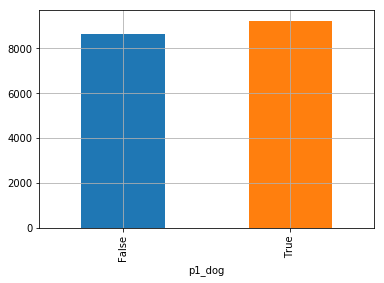

In [86]:

df.groupby('p1_dog').favorite_count.mean().plot(kind = 'bar');
plt.grid()

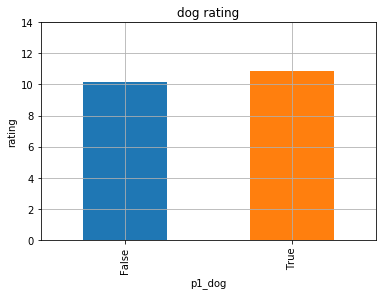

In [87]:

df.groupby('p1_dog').rating_numerator.mean().plot(kind = 'bar');
plt.title('dog rating')
plt.xlabel('p1_dog')
plt.ylabel('rating')
plt.ylim(0,14)
plt.grid()

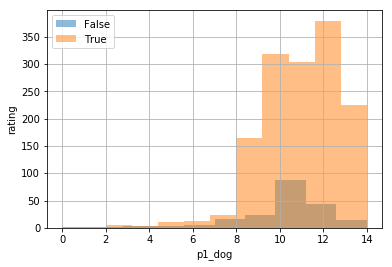

In [88]:
df.groupby('p1_dog').rating_numerator.plot(kind = 'hist', alpha = 0.5);
plt.xlabel('p1_dog')
plt.ylabel('rating')
plt.legend()
plt.grid()

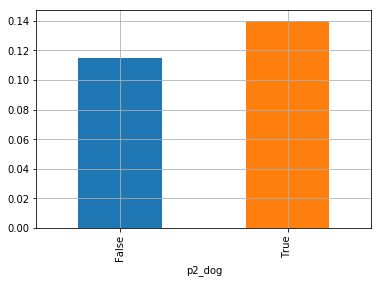

In [89]:
df.groupby('p2_dog').p2_conf.mean().plot(kind = 'bar');
plt.grid()


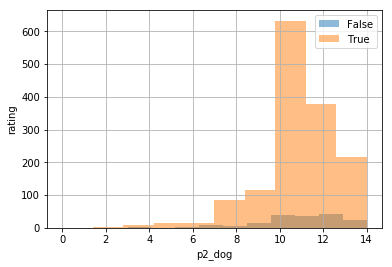

In [90]:
df.groupby('p2_dog').rating_numerator.plot(kind = 'hist', alpha = 0.5);
plt.xlabel('p2_dog')
plt.ylabel('rating')
plt.legend()
plt.grid()

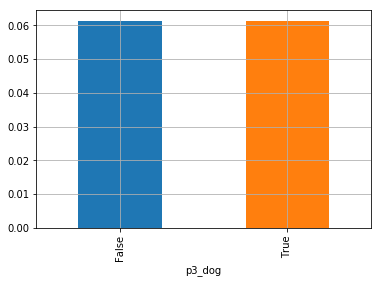

In [91]:
df.groupby('p3_dog').p3_conf.mean().plot(kind = 'bar');
plt.grid()


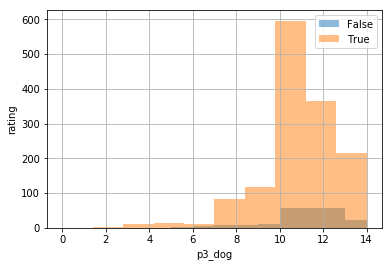

In [92]:
df.groupby('p3_dog').rating_numerator.plot(kind = 'hist', alpha = 0.5);
plt.xlabel('p3_dog')
plt.ylabel('rating')
plt.legend()
plt.grid()

### Convert in html

In [93]:
# Convert to html
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0